<a href="https://colab.research.google.com/github/majupadua/IA_7semestre/blob/main/Forca_PyGAD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="http://meusite.mackenzie.br/rogerio/mackenzie_logo/UPM.2_horizontal_vermelho.jpg"  width=300, align="right">
<br>
<br>
<br>
<br>
<br>

# **Algoritmos Genéticos**
---


In [ ]:
#@title **Identificação do Grupo**

#@markdown Integrantes do Grupo, nome completo em orgem alfabética (*informe \<RA\>,\<nome\>*)
Aluno1 = '10402554, Gabriella Braz' #@param {type:"string"}
Aluno2 = '10402264, Giovana Liao' #@param {type:"string"}
Aluno3 = '10400630, Maria Julia de Pádua ' #@param {type:"string"}




In [ ]:
#@title **Escolha a opção de Exercício Selecionado**
Exercicio_selecionado = "Exercício B. Forca" #@param ["Exercício A. Otimização multi-objetivo", "Exercício B. Forca"]




# **Resumo**

Este trabalho usa um algoritmo genético para resolver o jogo da Forca com a biblioteca PyGAD. O objetivo é descobrir a palavra secreta por meio de tentativas evolutivas, onde as melhores soluções são selecionadas e melhoradas a cada geração. O processo usa seleção, cruzamento e mutação para formar novas palavras, aproximando-se da resposta correta. O desempenho é analisado com diferentes configurações e gráficos de convergência.

# **Descrição da Solução**

**Representação das soluções:**

- Cada possível solução é uma sequência de números, onde cada número representa uma letra do alfabeto.

**Função de Aptidão (Fitness):**

- Compara cada solução com a palavra secreta.

- Cada letra correta na posição certa soma 1 ponto.

**Crossover (Recombinação):**

- Pais são combinados para criar novas soluções.

- Ajuda a misturar boas características das soluções anteriores.

**Mutação:**

- Pequenas mudanças aleatórias em algumas letras.

- Ajuda a explorar novas possibilidades e evitar que o algoritmo fique preso.

**Seleção:**

- As melhores soluções são escolhidas para continuar na próxima geração.

- Quanto melhor a solução, maior a chance de ser escolhida.

**Uso do PyGAD:**

- Facilita a implementação do algoritmo genético.

- Define parâmetros como número de gerações, população e taxa de mutação.

- Executa a evolução automaticamente.

# **Implementação**



# PyGDA para solucionar o jogo Forca



Instalação da biblioteca PyGAD

In [9]:
!pip install pygad

### Mapeamento de Caracteres  

Nesta parte do código, criamos um mapeamento entre letras do alfabeto e números inteiros.  

- `alfabeto`: Lista contendo todas as letras maiúsculas de A a Z.  
- `char_para_int`: Dicionário que associa cada letra a um número (A = 0, B = 1, ..., Z = 25).  
- `int_para_char`: Dicionário inverso, que converte números de volta para letras.  

Esse mapeamento é essencial para representar as palavras como números, permitindo que o algoritmo genético manipule os genes de forma eficiente.

In [30]:
import string
import pygad
import matplotlib.pyplot as plt

alfabeto = list(string.ascii_uppercase)
char_para_int = {char: idx for idx, char in enumerate(alfabeto)}
int_para_char = {idx: char for idx, char in enumerate(alfabeto)}


## Codificação da Palavra
Como o algoritmo genético trabalha melhor com números, convertemos letras em valores numéricos.


In [31]:
def codificar_palavra(palavra):
    return [char_para_int[c] for c in palavra]

### Função de Aptidão e Execução do Algoritmo  

Nesta parte do código, definimos a **função de aptidão** e a **execução do algoritmo genético** para encontrar a palavra secreta.  

**Função de Aptidão**  
   - Avalia quão próxima uma solução está da palavra secreta, contando quantas letras estão corretas na posição correta.  
   
**Função `rodar_algoritmo`**  
   - Converte a palavra secreta em números para facilitar a manipulação.  
   - Configura o algoritmo genético com parâmetros como número de gerações, tamanho da população e tipo de seleção.  
   - Executa o GA e obtém a melhor solução encontrada.  
   - Converte a solução numérica de volta para letras.  
   - Plota um gráfico mostrando a evolução da pontuação ao longo das gerações.  
   - Exibe no console a palavra secreta, a melhor palavra encontrada e a pontuação final.  

In [33]:
def funcao_aptidao(ga_instance, solucao, solucao_idx):
    return sum(1 for i in range(len(solucao)) if solucao[i] == palavra_secreta_codificada[i])

def rodar_algoritmo(palavra, num_geracoes=300, populacao=50):
    global palavra_secreta_codificada
    palavra_secreta_codificada = codificar_palavra(palavra)

    ga = pygad.GA(
        num_generations=num_geracoes,
        num_parents_mating=8,
        fitness_func=funcao_aptidao,
        sol_per_pop=populacao,
        num_genes=len(palavra),
        gene_space=list(range(len(alfabeto))),
        mutation_percent_genes=10,
        parent_selection_type="sss",
        keep_parents=2
    )

    ga.run()

    solucao, pontuacao, _ = ga.best_solution()
    palavra_encontrada = "".join(int_para_char[int(g)] for g in solucao)

    plt.plot(ga.best_solutions_fitness)
    plt.xlabel("Geração")
    plt.ylabel("Pontuação (letras corretas)")
    plt.title(f"Evolução da Solução - Palavra: {palavra}")
    plt.show()

    print(f"Palavra secreta: {palavra}")
    print(f"Melhor palavra encontrada: {palavra_encontrada}")
    print(f"Pontuação: {pontuacao}/{len(palavra)}\n")


# **Resultados (Testes)**


## Teste 1: Palavra curta - "MEU"

Nesta simulação, escolhemos uma palavra curta de 3 letras para testar a rapidez do algoritmo.
Esperamos que a convergência ocorra rapidamente, pois há poucas combinações possíveis.


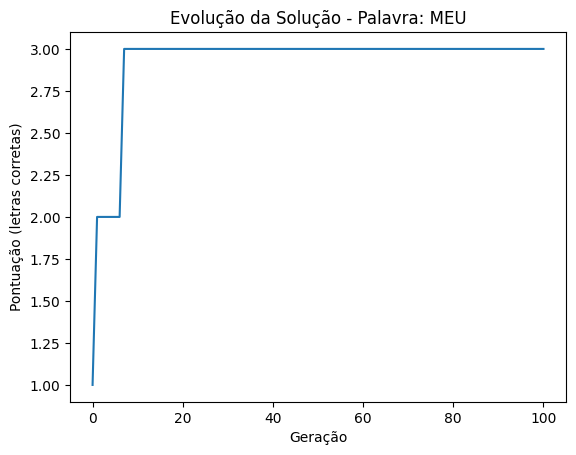

Palavra secreta: MEU
Melhor palavra encontrada: MEU
Pontuação: 3/3



In [35]:
rodar_algoritmo("MEU", num_geracoes=100, populacao=30)

## Teste 2: Palavra média - "GATO"

Agora usamos uma palavra de 4 letras, aumentando a complexidade. O espaço de busca cresce,
mas o algoritmo ainda deve convergir relativamente rápido.


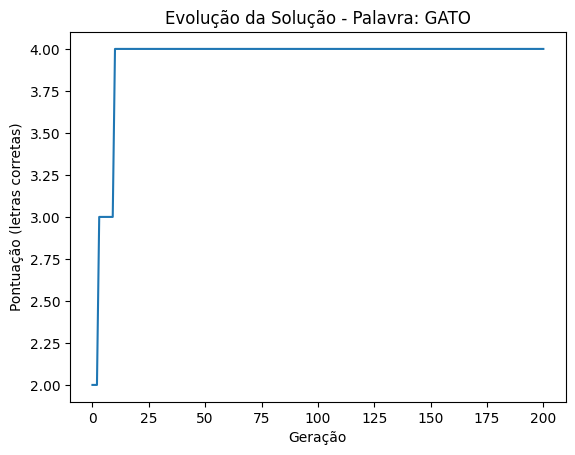

Palavra secreta: GATO
Melhor palavra encontrada: GATO
Pontuação: 4/4



In [25]:
rodar_algoritmo("GATO", num_geracoes=200, populacao=40)

## Teste 3: Palavra maior - "PYTHON"

Aqui usamos a palavra do código original. Como tem 6 letras, exigirá mais gerações para convergir.
Este é um bom teste para verificar a efetividade do algoritmo com uma configuração realista.


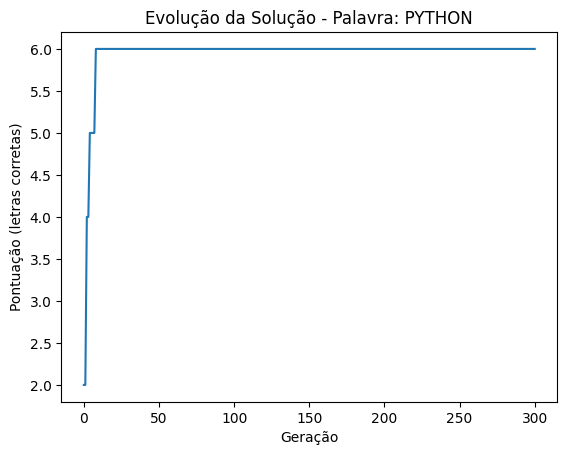

Palavra secreta: PYTHON
Melhor palavra encontrada: PYTHON
Pontuação: 5/6



In [26]:
rodar_algoritmo("PYTHON", num_geracoes=300, populacao=50)

## Teste 4: Palavra longa - "ALGORITMO"

Neste último teste, usamos uma palavra de 9 letras, tornando o espaço de busca ainda maior.
Será interessante observar como a convergência ocorre e se a solução ótima é encontrada.


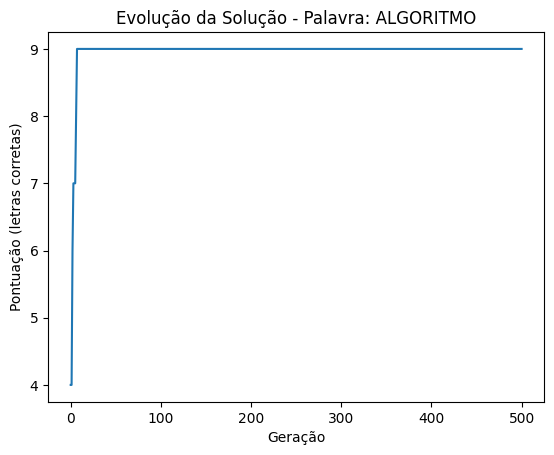

Palavra secreta: ALGORITMO
Melhor palavra encontrada: ALGORITMO
Pontuação: 9/9



In [27]:
rodar_algoritmo("ALGORITMO", num_geracoes=500, populacao=70)

# Conclusão

Os testes mostraram que:
- Palavras curtas são descobertas rapidamente, geralmente em menos de 100 gerações.
- Conforme a palavra cresce, a convergência fica mais lenta, exigindo mais gerações e uma população maior.
- Para palavras maiores, o AG pode encontrar soluções próximas da correta, mas precisa de ajustes na mutação e no tamanho da população para garantir melhores resultados.

Esse estudo mostra a eficácia dos Algoritmos Genéticos em resolver problemas de otimização simbólica,
mas também destaca suas limitações conforme a complexidade aumenta.


# **Referências**

PUGA, Mohamed. PyGAD Documentation. Disponível em: https://pygad.readthedocs.io/en/latest/.

SCIPY. SciPy.optimize: Genetic Algorithms. Disponível em: https://docs.scipy.org/doc/scipy/reference/optimize.html.

---

In [ ]:
#@title **Avaliação**
Resumo = 10 #@param {type:"slider", min:0, max:10, step:1}

Descricao_solucao = 7 #@param {type:"slider", min:0, max:10, step:1}

Implementacao = 9 #@param {type:"slider", min:0, max:10, step:1}

Resultados = 6 #@param {type:"slider", min:0, max:10, step:1}

Referencias = 7 #@param {type:"slider", min:0, max:10, step:1}

Geral = 7 #@param {type:"slider", min:0, max:10, step:1}








In [ ]:
#@title **Nota Final**
nota = Resumo + Descricao_solucao + Implementacao + Resultados + Referencias + Geral

nota = nota / 6

print(f'Nota final do trabalho {nota :.1f}')

import numpy as np
import pandas as pd

alunos = pd.DataFrame()

lista_tia = []
lista_nome = []

for i in range(1,6):
  exec("if Aluno" + str(i) + " !='None':  lista = Aluno" + str(i) + ".split(','); lista_tia.append(lista[0]); lista_nome.append(lista[1].upper())")

alunos['tia'] = lista_tia
alunos['nome'] = lista_nome
alunos['nota'] = np.round(nota,1)
print()
display(alunos)

Nota final do trabalho 7.7



,tia,nome,nota
0,1115665,ADRIANA FUJITA,7.7
1,1115677,DANIEL HENRIQUE,7.7
